In [1]:
import hist
import json
from coffea import util
import numpy as np

import matplotlib.pyplot as plt
import os

In [2]:
# def max_significance(h_sig, h_bkg):

#     sigs = h_sig.values()
#     bkgs = h_bkg.values()

#     cum_sigs = []
#     cum_bkgs = []

#     for i in range(len(sigs)):
#         cum_sigs += [sum(sigs[:i])]
#         cum_bkgs += [sum(bkgs[:i])]

#     print(cum_sigs,cum_bkgs)
#     significances = cum_sigs/np.sqrt(cum_bkgs)
#     print(significances)
    
#     return np.nanmax(significances)

In [3]:
import os
def max_significance(h_sig, h_bkg):

    sigs = h_sig.values()
    bkgs = h_bkg.values()

    cum_sigs_below = []
    cum_bkgs_below = []

    cum_sigs_above = []
    cum_bkgs_above = []

    for i in range(len(sigs)):
        cum_sigs_below += [sum(sigs[:i])]
        cum_bkgs_below += [sum(bkgs[:i])]

        cum_sigs_above += [sum(sigs[i:])]
        cum_bkgs_above += [sum(bkgs[i:])]

    significance_below = np.nan_to_num(cum_sigs_below/np.sqrt(cum_bkgs_below))
    significance_above = np.nan_to_num(cum_sigs_above/np.sqrt(cum_bkgs_above))

    significances = np.sqrt(np.square(significance_below) + np.square(significance_above) )
    # print(significances)
    
    return np.nanmax(significances)

In [4]:
with open('xsec.json') as f:
    xs = json.load(f)
        
with open('pmap.json') as f:
    pmap = json.load(f)

with open('lumi.json') as f:
    lumis = json.load(f)

In [5]:
h_ggf = util.load("coffea/ggF.coffea")[0]

In [6]:
for key, hist in h_ggf['GluGluHToBB'].items():
    #print(h_ggf['GluGluHToBB'][key])
    if key == 'sumw':
        continue
    h_ggf['GluGluHToBB'][key] *= xs['GluGluHToBB'] * 1000 * lumis["2018"] / h_ggf['GluGluHToBB']['sumw']
    # print(h_ggf['GluGluHToBB'][key])

In [7]:
h_qcd = {'TotalQCD':{}}

qcd_slices = [
              "Pt1000to1400",
              "Pt1400to1800",
              "Pt470to600",
              "Pt600to800",
              "Pt800to1000",
              "Pt2400to3200",
              "Pt1800to2400",
              "Pt3200toInf",
    "Pt300to470"
             ]

# Loop over the histograms (they have the same names as for ggF)
for hname in h_ggf['GluGluHToBB'].keys():

    # Skip sumw because it's not a histogram
    if hname == 'sumw':
        continue

    # Loop over all of the QCD slices
    for s in qcd_slices:

        # Read the histograms from one slice
        h = util.load("coffea/QCD_"+s+".coffea")[0]
        # print(h.keys())
        proc = list(h.keys())[0]

        h_qcd[proc] = {}
        h_qcd[proc][hname] = h[proc][hname]
        
        # Scale it! Use string.replace for some funny business with the name of the pT slice
        h_qcd[proc][hname] *= xs[proc.replace("Pt_","PT")] * 1000 * lumis["2018"] / h[proc]['sumw']

    # Add each slice to the total
    h_qcd['TotalQCD'][hname] = sum([h_qcd["QCD_" +proc.replace("Pt","Pt_")][hname] for proc in qcd_slices])

# # Sanity check: Draw the pT distribution and make sure it is smoothly falling
# h_qcd['TotalQCD']['ExampleHistogram'][{'msoftdrop':sum,'n2':sum}].plot1d();
# plt.yscale('log')

In [8]:
print(h_qcd.keys())

dict_keys(['TotalQCD', 'QCD_Pt_1000to1400', 'QCD_Pt_1400to1800', 'QCD_Pt_470to600', 'QCD_Pt_600to800', 'QCD_Pt_800to1000', 'QCD_Pt_2400to3200', 'QCD_Pt_1800to2400', 'QCD_Pt_3200toInf', 'QCD_Pt_300to470'])


/tmp/ipykernel_688717/709918588.py:20: RuntimeWarning: invalid value encountered in divide
  significance_below = np.nan_to_num(cum_sigs_below/np.sqrt(cum_bkgs_below))
/tmp/ipykernel_688717/709918588.py:21: RuntimeWarning: invalid value encountered in divide
  significance_above = np.nan_to_num(cum_sigs_above/np.sqrt(cum_bkgs_above))


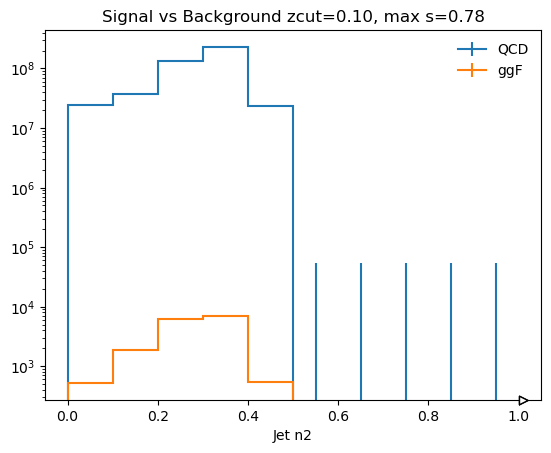

In [36]:
h_bkg = h_qcd['TotalQCD']['ExampleHistogram'][{'eta':sum,'msoftdrop':sum,'pt':sum}]
h_sig = h_ggf['GluGluHToBB']['ExampleHistogram'][{'eta':sum,'msoftdrop':sum,'pt':sum}]

# Get the significance
max_sig=max_significance(h_sig,h_bkg)

# N2 plot:
h_bkg.plot1d(label='QCD');
h_sig.plot1d(label='ggF');

plt.title(f'Signal vs Background zcut=0.10, max s={max_sig:.2f}')
plt.legend(frameon=False);
plt.yscale('log')

/tmp/ipykernel_688717/709918588.py:20: RuntimeWarning: invalid value encountered in divide
  significance_below = np.nan_to_num(cum_sigs_below/np.sqrt(cum_bkgs_below))
/tmp/ipykernel_688717/709918588.py:21: RuntimeWarning: invalid value encountered in divide
  significance_above = np.nan_to_num(cum_sigs_above/np.sqrt(cum_bkgs_above))


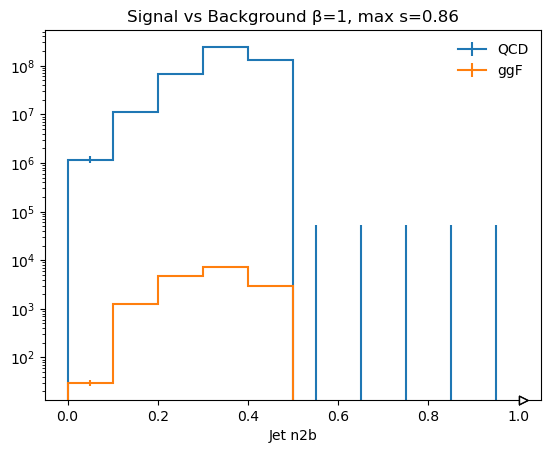

In [24]:
h_bkg = h_qcd['TotalQCD']['ExampleHistogram1'][{'msoftdrop1':sum}]
h_sig = h_ggf['GluGluHToBB']['ExampleHistogram1'][{'msoftdrop1':sum}]

# Get the significance
# print(max_significance(h_sig,h_bkg))
max_sig = max_significance(h_sig, h_bkg)

# N2 plot:
h_bkg.plot1d(label='QCD');
h_sig.plot1d(label='ggF');

plt.title(f'Signal vs Background β=1, max s={max_sig:.2f}')
plt.legend(frameon=False);
plt.yscale('log')

/tmp/ipykernel_688717/709918588.py:20: RuntimeWarning: invalid value encountered in divide
  significance_below = np.nan_to_num(cum_sigs_below/np.sqrt(cum_bkgs_below))
/tmp/ipykernel_688717/709918588.py:21: RuntimeWarning: invalid value encountered in divide
  significance_above = np.nan_to_num(cum_sigs_above/np.sqrt(cum_bkgs_above))


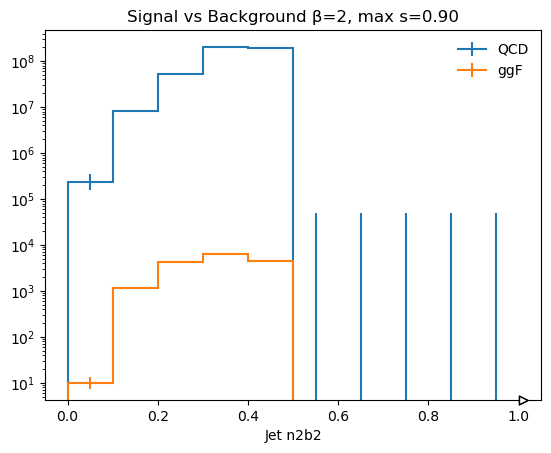

In [28]:
h_bkg = h_qcd['TotalQCD']['ExampleHistogram2'][{'msoftdrop2':sum}]
h_sig = h_ggf['GluGluHToBB']['ExampleHistogram2'][{'msoftdrop2':sum}]

# Get the significance
# print(max_significance(h_sig,h_bkg))
max_sig = max_significance(h_sig, h_bkg)

# N2 plot:
h_bkg.plot1d(label='QCD');
h_sig.plot1d(label='ggF');

plt.title(f'Signal vs Background β=2, max s={max_sig:.2f}')
plt.legend(frameon=False);
plt.yscale('log')

/tmp/ipykernel_688717/709918588.py:20: RuntimeWarning: invalid value encountered in divide
  significance_below = np.nan_to_num(cum_sigs_below/np.sqrt(cum_bkgs_below))
/tmp/ipykernel_688717/709918588.py:21: RuntimeWarning: invalid value encountered in divide
  significance_above = np.nan_to_num(cum_sigs_above/np.sqrt(cum_bkgs_above))


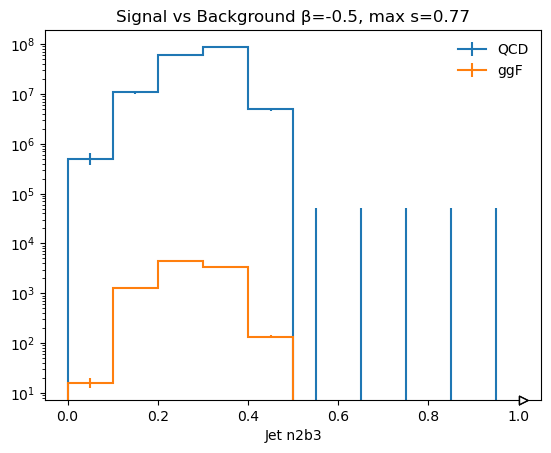

In [29]:
h_bkg = h_qcd['TotalQCD']['ExampleHistogram3'][{'msoftdrop3':sum}]
h_sig = h_ggf['GluGluHToBB']['ExampleHistogram3'][{'msoftdrop3':sum}]

# Get the significance
# print(max_significance(h_sig,h_bkg))
max_sig = max_significance(h_sig, h_bkg)

# N2 plot:
h_bkg.plot1d(label='QCD');
h_sig.plot1d(label='ggF');

plt.title(f'Signal vs Background β=-0.5, max s={max_sig:.2f}')
plt.legend(frameon=False);
plt.yscale('log')

/tmp/ipykernel_688717/709918588.py:20: RuntimeWarning: invalid value encountered in divide
  significance_below = np.nan_to_num(cum_sigs_below/np.sqrt(cum_bkgs_below))
/tmp/ipykernel_688717/709918588.py:21: RuntimeWarning: invalid value encountered in divide
  significance_above = np.nan_to_num(cum_sigs_above/np.sqrt(cum_bkgs_above))


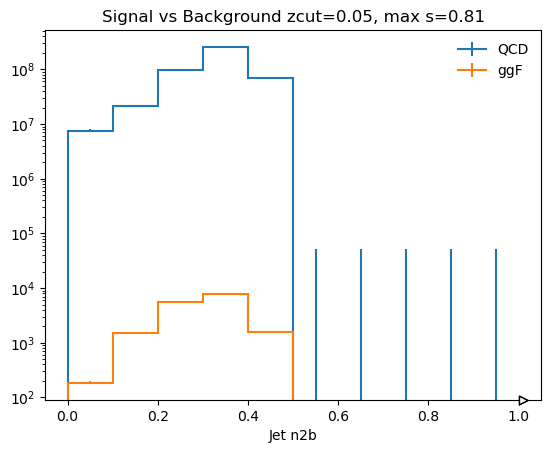

In [33]:
h_bkg = h_qcd['TotalQCD']['ExampleHistogram4'][{'msoftdropz1':sum}]
h_sig = h_ggf['GluGluHToBB']['ExampleHistogram4'][{'msoftdropz1':sum}]

# Get the significance
# print(max_significance(h_sig,h_bkg))
max_sig = max_significance(h_sig, h_bkg)

# N2 plot:
h_bkg.plot1d(label='QCD');
h_sig.plot1d(label='ggF');

plt.title(f'Signal vs Background zcut=0.05, max s={max_sig:.2f}')
plt.legend(frameon=False);
plt.yscale('log')

/tmp/ipykernel_688717/709918588.py:20: RuntimeWarning: invalid value encountered in divide
  significance_below = np.nan_to_num(cum_sigs_below/np.sqrt(cum_bkgs_below))
/tmp/ipykernel_688717/709918588.py:21: RuntimeWarning: invalid value encountered in divide
  significance_above = np.nan_to_num(cum_sigs_above/np.sqrt(cum_bkgs_above))


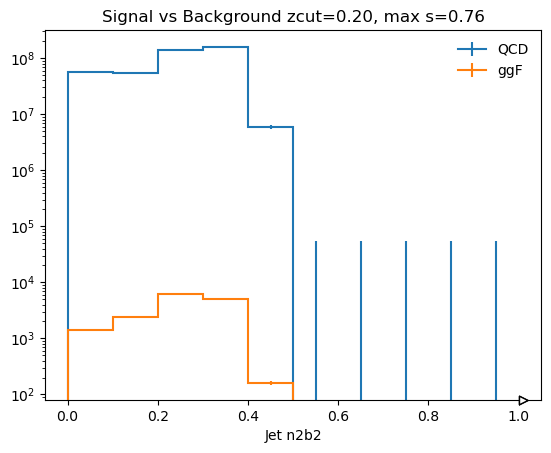

In [35]:
h_bkg = h_qcd['TotalQCD']['ExampleHistogram5'][{'msoftdropz2':sum}]
h_sig = h_ggf['GluGluHToBB']['ExampleHistogram5'][{'msoftdropz2':sum}]

# Get the significance
# print(max_significance(h_sig,h_bkg))
max_sig = max_significance(h_sig, h_bkg)

# N2 plot:
h_bkg.plot1d(label='QCD');
h_sig.plot1d(label='ggF');

plt.title(f'Signal vs Background zcut=0.20, max s={max_sig:.2f}')
plt.legend(frameon=False);
plt.yscale('log')

In [ ]:
# h_bkg = h_qcd['TotalQCD']['ExampleHistogram'][{'n2':sum}]
# h_sig = h_ggf['GluGluHToBB']['ExampleHistogram'][{'n2':sum}]

# # Get the significance
# max_significance(h_sig,h_bkg)

# # N2 plot:
# h_bkg.plot1d(label='QCD');
# h_sig.plot1d(label='ggF');

# plt.title('Signal vs Background')
# plt.ylabel('Events')
# plt.legend(frameon=False);
# plt.yscale('log')

In [ ]:
h_bkg = h_qcd['TotalQCD']['ExampleHistogram1'][{'msoftdrop1':sum}]
h_sig = h_ggf['GluGluHToBB']['ExampleHistogram1'][{'msoftdrop1':sum}]

# Get the significance
max_significance(h_sig,h_bkg)

# N2 plot:
h_bkg.plot1d(label='QCD');
h_sig.plot1d(label='ggF');

plt.title('Signal vs Background β=1')
plt.legend(frameon=False);
plt.yscale('log')

In [ ]:
h_bkg = h_qcd['TotalQCD']['ExampleHistogram3'][{'msoftdrop3':sum}]
h_sig = h_ggf['GluGluHToBB']['ExampleHistogram3'][{'msoftdrop3':sum}]

# Get the significance
print(max_significance(h_sig,h_bkg))

# N2 plot:
h_bkg.plot1d(label='QCD');
h_sig.plot1d(label='ggF');

plt.title('Signal vs Background β=-0.5')
plt.legend(frameon=False);
plt.yscale('log')

In [ ]:
h_bkg = h_qcd['TotalQCD']['ExampleHistogram4'][{'msoftdropz1':sum}]
h_sig = h_ggf['GluGluHToBB']['ExampleHistogram4'][{'msoftdropz1':sum}]

# Get the significance
print(max_significance(h_sig,h_bkg))

# N2 plot:
h_bkg.plot1d(label='QCD');
h_sig.plot1d(label='ggF');

plt.title('Signal vs Background zcut=0.05')
plt.legend(frameon=False);
plt.yscale('log')

In [ ]:
h_bkg = h_qcd['TotalQCD']['ExampleHistogram5'][{'msoftdropz2':sum}]
h_sig = h_ggf['GluGluHToBB']['ExampleHistogram5'][{'msoftdropz2':sum}]

# Get the significance
print(max_significance(h_sig,h_bkg))

# N2 plot:
h_bkg.plot1d(label='QCD');
h_sig.plot1d(label='ggF');

plt.title('Signal vs Background zcut=0.20')
plt.legend(frameon=False);
plt.yscale('log')

In [ ]:
# h_bkg = h_qcd['TotalQCD']['ExampleHistogram'][{'n2':sum}]
# h_sig = h_ggf['GluGluHToBB']['ExampleHistogram'][{'n2':sum}]

# # Get the significance
# max_significance(h_sig,h_bkg)

# # N2 plot:
# h_bkg.plot1d(label='QCD');
# h_sig.plot1d(label='ggF');

# plt.legend(frameon=False);
# plt.yscale('log')